In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
df=pd.read_csv('C:\\Users\\USER-11\\Downloads\\Credit_Card_Applications.csv')

In [9]:
df.shape

(690, 16)

In [10]:
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [11]:
df.dtypes

CustomerID      int64
A1              int64
A2            float64
A3            float64
A4              int64
A5              int64
A6              int64
A7            float64
A8              int64
A9              int64
A10             int64
A11             int64
A12             int64
A13             int64
A14             int64
Class           int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [13]:
df.isnull().sum()

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

In [14]:
df['Class'].value_counts()

Class
0    383
1    307
Name: count, dtype: int64

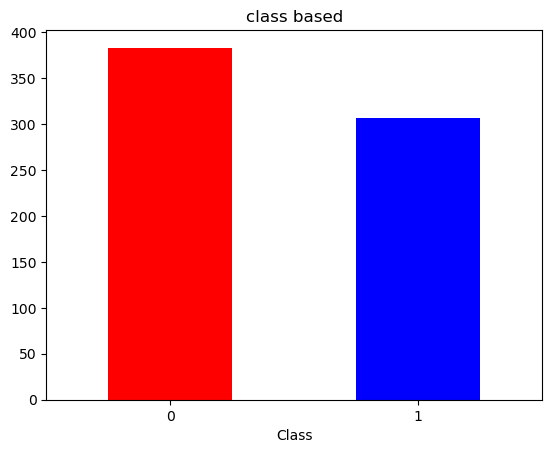

In [15]:
df['Class'].value_counts().plot(kind='bar',color=['red','blue'])
plt.title('class based')
plt.xticks(rotation=0)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [17]:
x = df.drop(['CustomerID','A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14'],axis=1)
y =df['Class']

In [18]:
numerical_cols = x.select_dtypes(include=['int64','float64']).columns.tolist()

In [19]:
categorical_cols=x.select_dtypes(include=['object']).columns.tolist()

In [20]:
numerical_transformer = Pipeline(steps=[
                            ('imputer',SimpleImputer(strategy='mean')),
                            ('scaler',StandardScaler())
])

In [21]:
categorical_transformer = Pipeline(steps=[
                          ('imputer',SimpleImputer(strategy='most_frequent')),
                          ('onehot ',OneHotEncoder(handle_unknown='ignore'))
])

In [22]:
preprocessor = ColumnTransformer(transformers=[
                              ('num',numerical_transformer,numerical_cols),
                              ('cat',categorical_transformer,categorical_cols)
])

In [23]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model_1 = Pipeline (steps =[
                    ('pre',preprocessor),('reg',LinearRegression())
])

In [26]:
model_1.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Class']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot ',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('reg', LinearRegression())])

In [27]:
prediction_1 = model_1 .predict(X_test)

print(f'Accuracy:{r2_score(y_test,prediction_1)*100:.2f}')
print(f'MAE:{mean_absolute_error(y_test,prediction_1):.2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,prediction_1)):.2f}')

Accuracy:100.00
MAE:0.00
RMSE:0.00


In [28]:
from sklearn .tree import DecisionTreeRegressor

In [30]:
model_2 = Pipeline(steps=[
                  ('pre',preprocessor),('reg',DecisionTreeRegressor(max_depth=5,random_state=42))
])

In [31]:
model_2.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Class']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot ',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('reg', DecisionTreeRegressor(max_depth=5, random_state=42))])

In [32]:
prediction_2 =  model_2 .predict(X_test)



print(f'Accuracy:{r2_score(y_test,prediction_2)*100:.2f}')
print(f'MAE:{mean_absolute_error(y_test,prediction_2):.2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,prediction_2)):.2f}')

Accuracy:100.00
MAE:0.00
RMSE:0.00


In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
model_3 = Pipeline(steps=[
    ('pre',preprocessor),('reg',RandomForestRegressor(n_estimators=100,random_state=42))
])

In [35]:
model_3.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Class']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot ',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('reg', RandomForestRegressor(random_state=42))])

In [36]:
prediction_3 = model_3.predict(X_test)

print(f'Accuracy:{r2_score(y_test,prediction_3)*100:.2f}')
print(f'MAE:{mean_absolute_error(y_test,prediction_3):.2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,prediction_3)):.2f}')

Accuracy:100.00
MAE:0.00
RMSE:0.00
